In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import utils
%matplotlib inline

In [2]:
file_name = "results/analysis-crypto-tweets-processed.csv"
file_test = "dataset/crypto-tweets-processed.csv"
save_to = "results/crypto-predicted.csv"

In [3]:
df_pred = pd.read_csv(file_name, 
                      names=["id",
                            "prediction",
                            "sentiment",
                            "text"],
                      skiprows=[0])

df_test = pd.read_csv(file_test, header=None)
df_pred['sentiment'] = np.where(df_pred['prediction'] == 0, 'negative', 'positive')
df_pred['text'] = df_test[1]

In [4]:
df_pred.head(40)

,id,prediction,sentiment,text
0,0,1,positive,b USER_MENTION less than hours crypto USER_MEN...
1,1,0,negative,bas promised cloakcoin internal security audit...
2,2,1,positive,b USER_MENTION forget bitcoin its blockchain t...
3,3,1,positive,b USER_MENTION what is aelf elf and what is dr...
4,4,1,positive,b USER_MENTION check out our revised whitepape...
5,5,1,positive,b USER_MENTION dogezer will be presented at wo...
6,6,1,positive,announced that it will joint venture with cham...
7,7,1,positive,bdid you invest in myriad xmy its listed on bi...
8,8,0,negative,the bankpire strike back ripple rapidly closin...
9,9,1,positive,b USER_MENTION forget bitcoin its blockchain t...


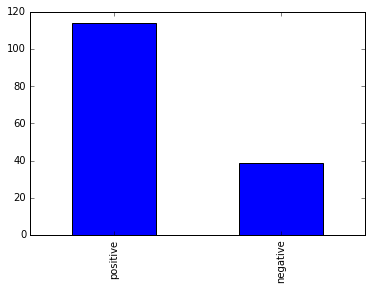

In [5]:
df_pred['sentiment'].value_counts().plot(kind='bar')

In [6]:
df_pred.to_csv(path_or_buf=save_to,
               sep=',',
               columns=['id', 'prediction', 'text'],
               header=None,
               index=False,
               encoding='utf-8')

In [8]:
FREQ_DIST_FILE = 'results/crypto-predicted-freqdist.pkl'
BI_FREQ_DIST_FILE = 'results/crypto-predicted-freqdist-bi.pkl'

In [9]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(20)
unigrams

[('b', 107),
 ('to', 65),
 ('crypto', 63),
 ('the', 61),
 ('and', 34),
 ('is', 33),
 ('on', 32),
 ('of', 29),
 ('in', 29),
 ('with', 29),
 ('a', 25),
 ('blockchain', 18),
 ('bitcoin', 18),
 ('our', 17),
 ('you', 17),
 ('cryptocurrency', 17),
 ('ico', 17),
 ('that', 16),
 ('for', 16),
 ('this', 16)]

In [10]:
with open(BI_FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
bigrams = freq_dist.most_common(20)
bigrams

[(('wsj', 'nytimes'), 9),
 (('crypto', 'blockchain'), 6),
 (('on', 'our'), 6),
 (('bmcgraw', 'intends'), 6),
 (('intends', 'to'), 6),
 (('to', 'acquire'), 6),
 (('acquire', 'an'), 6),
 (('an', 'automotive'), 6),
 (('automotive', 'dealership'), 6),
 (('dealership', 'services'), 6),
 (('services', 'wsj'), 6),
 (('the', 'world'), 5),
 (('world', 'crypto'), 5),
 (('we', 'are'), 5),
 (('to', 'the'), 5),
 (('of', 'the'), 5),
 (('to', 'get'), 5),
 (('on', 'crypto'), 5),
 (('with', 'crypto'), 5),
 (('b', 'forget'), 4)]

In [11]:
with open(FREQ_DIST_FILE, 'rb') as pkl_file:
    freq_dist = pickle.load(pkl_file)
unigrams = freq_dist.most_common(100)
log_ranks = np.log(range(1, 101))
log_freqs = np.log([i[1] for i in unigrams])
z = np.polyfit(log_ranks, log_freqs, 1)
p = np.poly1d(z)
p

poly1d([-0.80910616,  4.36079972])